# Dissertation Code

In [55]:
import numpy as np
import pandas as pd
import scipy.stats as norm
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt
from collections import Counter
from statsmodels.stats.weightstats import ztest as ztest

## Read Data

In [2]:
listings_raw =  pd.read_csv('Listings.csv', encoding = 'latin1')

C:\Users\Spand\AppData\Local\Temp\ipykernel_1508\1980924999.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_raw =  pd.read_csv('Listings.csv', encoding = 'latin1')


In [3]:
reviews_raw =  pd.read_csv('Reviews.csv', encoding = 'latin1')

## Reviews

In [4]:
#Reviews
list(reviews_raw.columns)

reviews_raw.dtypes

reviews_raw.isnull().sum().sum()
#0
reviews_raw["date"] = pd.to_datetime(reviews_raw["date"])
reviews_raw.dtypes

reviews_raw.shape
#(5373143, 4)
reviews_raw['listing_id'].nunique()
#193556

#Grouping to get reviews for each listing
reviews = reviews_raw.groupby(['listing_id']).size()

reviews.shape
#193556

(193556,)

## Listings

In [5]:
listings_raw.shape

(279712, 33)

In [6]:
listings_raw.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [7]:
listings_raw.shape

(279712, 33)

In [8]:
listings_raw.groupby(['city']).size()

city
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Istanbul          24519
Mexico City       20065
New York          37012
Paris             64690
Rio de Janeiro    26615
Rome              27647
Sydney            33630
dtype: int64

In [9]:
cities_selected = ['Paris', 'Sydney', 'New York', 'Bangkok']
listings_cities = listings_raw.loc[listings_raw['city'].isin(cities_selected)]

In [10]:
listings_cities.shape

(154693, 33)

In [11]:
listings_cities.groupby(['city']).size()

city
Bangkok     19361
New York    37012
Paris       64690
Sydney      33630
dtype: int64

In [12]:
listings_cities = listings_cities.drop(columns = ['name', 'host_has_profile_pic', 'host_identity_verified', 'host_total_listings_count', 'district', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'minimum_nights', 'maximum_nights'])
listings_cities.head()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,latitude,longitude,property_type,room_type,...,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,1466919,2011-12-03,f,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,...,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,10328771,2013-11-29,f,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,...,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,19252768,2014-07-31,f,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,...,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,10668311,2013-12-17,f,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,...,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,24837558,2014-12-14,f,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,...,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [13]:
listings_cities.shape

(154693, 22)

## Reveiw Scores

In [14]:
review_scores = listings_cities[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

listings_cities = listings_cities.drop(columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

#listings_cities['amenities'] = listings_cities['amenities'].str[:-1] 
#listings_cities['amenities'] = listings_cities['amenities'].str[1:] 
#listings_cities.shape
listings_cities.head()

,listing_id,host_id,host_since,host_is_superhost,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,instant_bookable
0,281420,1466919,2011-12-03,f,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,f
1,3705183,10328771,2013-11-29,f,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,f
2,4082273,19252768,2014-07-31,f,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,f
3,4797344,10668311,2013-12-17,f,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,f
4,4823489,24837558,2014-12-14,f,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,f


## Amenities

In [15]:
amen_list = []

In [16]:
for i in listings_cities.amenities:
    b = i.replace('"','')
    a = b.split(',')
    for j in a:
        amen_list.append(j)

In [17]:
Counter(amen_list).most_common(20)
# Wifi, Heating, Kitchen, TV, Hair Dryer, Dedicated Workplace
#Make Long Term stays allowed a seperate column

[(' Wifi', 136324),
 (' Essentials', 129274),
 (' Kitchen', 120337),
 (' Long term stays allowed', 118172),
 (' Hangers', 112725),
 (' Smoke alarm', 104865),
 (' TV', 101219),
 (' Heating', 100089),
 (' Hair dryer', 98764),
 (' Iron', 90517),
 (' Dedicated workspace', 88289),
 (' Washer', 88047),
 (' Hot water', 86276),
 (' Shampoo', 84757),
 (' Dishes and silverware', 64562),
 (' Dryer', 60828),
 (' Air conditioning', 55829),
 (' Cooking basics', 55179),
 (' Refrigerator', 51249),
 (' Microwave', 50144)]

## Currency Conversion

In [18]:
# 1 EUR = 1.1 USD
# 1 AUS = 0.66 USD
# 1 HKD = 0.13 USD

def convert_to_usd(row):
    city = row['city']
    price = row['price']
    if city == 'Paris':
        exchange_rate = 1.1
    elif city == 'Sydney':
        exchange_rate = 0.66
    elif city == 'Bangkok':
        exchange_rate = 0.13
    else:
        exchange_rate = 1
    return price * exchange_rate

listings_cities['Price_USD'] = listings_cities.apply(convert_to_usd, axis = 1)
listings_cities['USD_pp'] = listings_cities['Price_USD']/listings_cities['accommodates']
listings_dupe = listings_cities

## Outlier Detection

In [19]:
#Remove the 0s

#listings_cities[listings_cities.accommodates == 0].shape[0]
#68
#listings_cities[listings_cities.Price_USD == 0].shape[0]
#23

listings_cities = listings_cities[listings_cities['accommodates'] != 0]
listings_cities = listings_cities[listings_cities['Price_USD'] != 0]

#fig = plt.figure(figsize =(10, 7))
#plt.boxplot(listings_cities['accommodates'])
#plt.show()

#listings_cities.shape

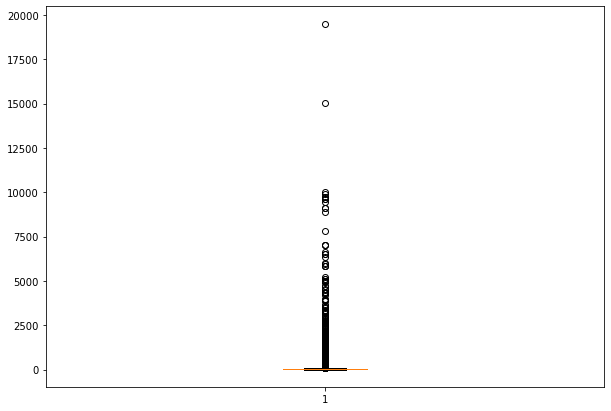

In [20]:
#listings_cities =  listings_dupe

fig = plt.figure(figsize =(10, 7))
plt.boxplot(listings_cities['USD_pp'])
plt.show()

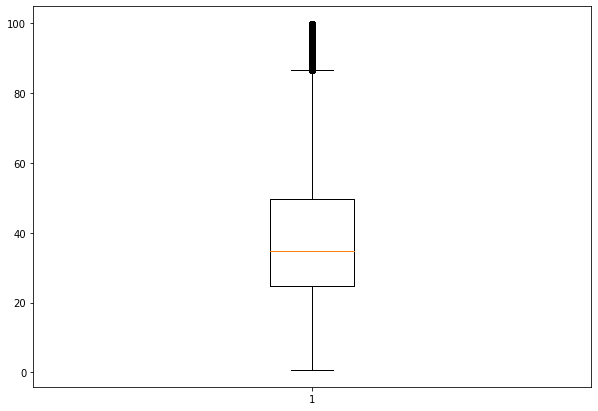

In [21]:
#Remove the higher outliers
Q1 = listings_cities['USD_pp'].quantile(0.25)
Q3 = listings_cities['USD_pp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper

listings_cities = listings_cities[listings_cities['USD_pp'] < upper]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(listings_cities['USD_pp'])
plt.show()

In [22]:
listings_cities.shape

(144207, 17)

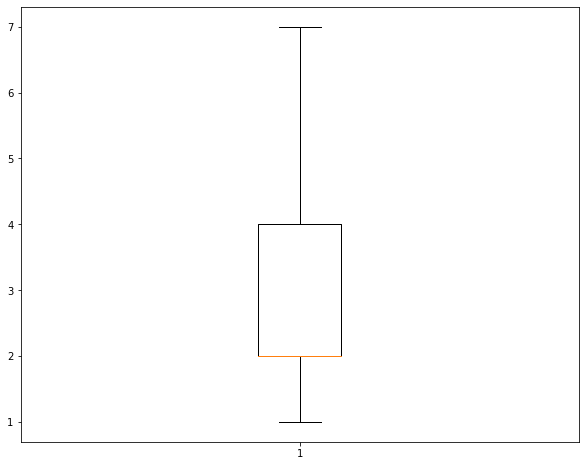

In [23]:
listings_cities = listings_cities[listings_cities['accommodates'] < 8]

fig = plt.figure(figsize =(10, 8))
plt.boxplot(listings_cities['accommodates'])
plt.show()

In [24]:
listings_cities.shape

(139494, 17)

In [25]:
#listings_c = listings_cities[listings_cities['Price_USD']]

#fig = plt.figure(figsize =(10, 7))
#plt.boxplot(listings_cities['USD_pp'])
#plt.show()

#listings_cities['USD_pp'].plot(kind='kde')
min(listings_cities['USD_pp'])

1.1

## Charts 

C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USD_pp', ylabel='Density'>

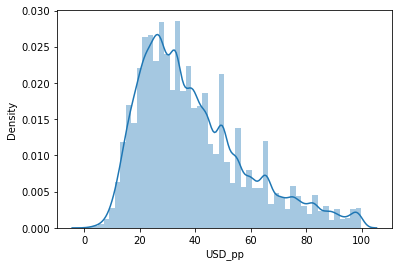

In [59]:
sns.distplot(listings_cities['USD_pp'])

In [63]:
listings_cities['USD_pp'].mode()

0    33.0
Name: USD_pp, dtype: float64

([<matplotlib.patches.Wedge at 0x1f531cdc0a0>,
 [Text(0.2088043463182566, 1.0800003448881883, 'Paris'),
  Text(-1.028916670322132, -0.38901219201101855, 'New York'),
  Text(0.24141816850455497, -1.073180911084383, 'Sydney'),
  Text(1.0402265495421326, -0.3576712535662736, 'Bangkok')],
 [Text(0.11389327980995813, 0.589091097211739, '43.9%'),
  Text(-0.5612272747211627, -0.21218846836964647, '23.7%'),
  Text(0.13168263736612087, -0.5853714060460271, '21.9%'),
  Text(0.5673962997502541, -0.19509341103614922, '10.5%')])

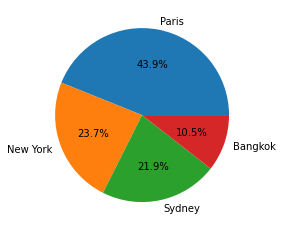

In [27]:
#cities_count = listings_cities.groupby(['city']).size()
#cities_count

#fig, ax = plt.subplots()
#ax.pie(listings_cities.city, labels = city, autopct = '%1.1f%%')

plt.pie(listings_cities['city'].value_counts().values, labels = listings_cities['city'].value_counts().index, autopct = '%1.1f%%')

<AxesSubplot:xlabel='city', ylabel='USD_pp'>

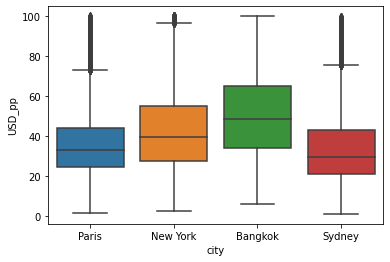

In [28]:
sns.boxplot(data = listings_cities, x = 'city', y = 'USD_pp')

<AxesSubplot:xlabel='room_type', ylabel='USD_pp'>

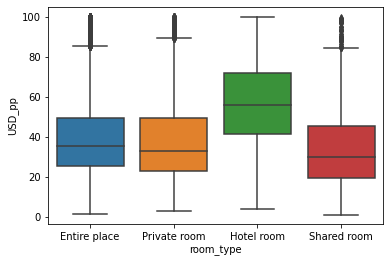

In [29]:
sns.boxplot(data = listings_cities, x = 'room_type', y = 'USD_pp')

#listings_raw.groupby(['room_type']).size()

In [30]:
listings_cities.to_excel('Clean.xlsx', sheet_name = 'Sheet1', index = False)

## Cities Split 

In [31]:
paris_listings = listings_cities[(listings_cities['city'] == 'Paris')]
sydney_listings = listings_cities[(listings_cities['city'] == 'Sydney')]
ny_listings = listings_cities[(listings_cities['city'] == 'New York')]
bangkok_listings = listings_cities[(listings_cities['city'] == 'Bangkok')]

In [32]:
listings_cities.groupby(['city']).size()

city
Bangkok     14705
New York    33010
Paris       61267
Sydney      30512
dtype: int64

In [33]:
listings_raw.groupby(['host_is_superhost']).size()

host_is_superhost
f    229294
t     50253
dtype: int64

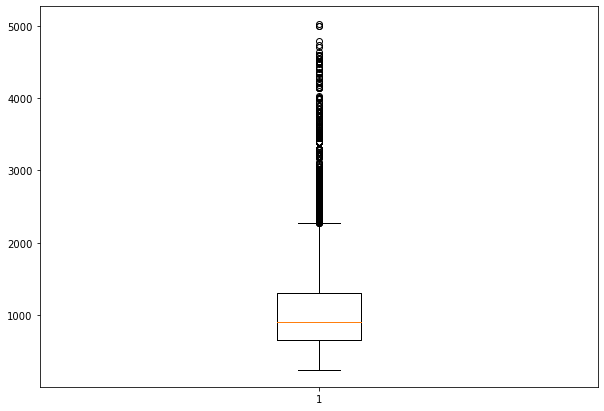

In [34]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(bangkok_listings['price'])
plt.show()

In [35]:
print(min(listings_cities['accommodates']))

1


C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Spand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

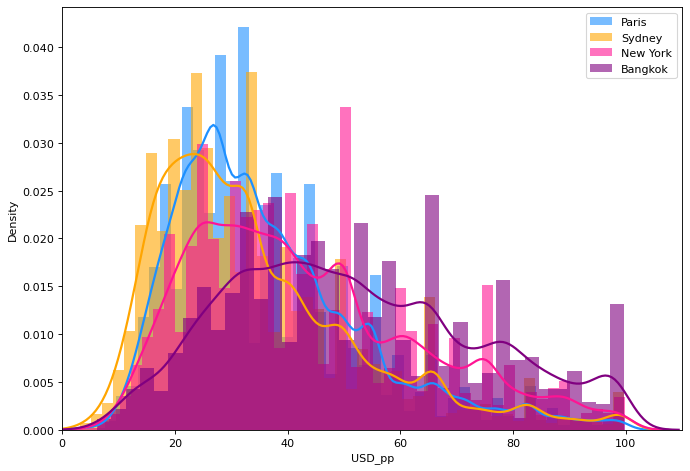

In [72]:
kwargs = dict(hist_kws = {'alpha':.6}, kde_kws = {'linewidth':2})

plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(paris_listings['USD_pp'], color = "dodgerblue", label = "Paris", **kwargs)
sns.distplot(sydney_listings['USD_pp'], color = "orange", label = "Sydney", **kwargs)
sns.distplot(ny_listings['USD_pp'], color = "deeppink", label = "New York", **kwargs)
sns.distplot(bangkok_listings['USD_pp'], color = "purple", label = "Bangkok", **kwargs)
plt.xlim(0, 110)
plt.legend();

In [84]:
bangkok_listings['USD_pp'].mode()

0    65.0
Name: USD_pp, dtype: float64

## Hypothesis Testing 

### Hypothesis 1: Host vs Superhost

In [36]:
listings_raw.groupby(['host_is_superhost']).size()

host_is_superhost
f    229294
t     50253
dtype: int64

In [37]:
superhost_listings = listings_cities[(listings_cities['host_is_superhost'] == 'f')]
host_listings = listings_cities[(listings_cities['host_is_superhost'] == 't')]

ztest(superhost_listings['USD_pp'], host_listings['USD_pp'], value=0)

(-17.92017855898731, 8.206430706791202e-72)

<AxesSubplot:xlabel='host_is_superhost'>

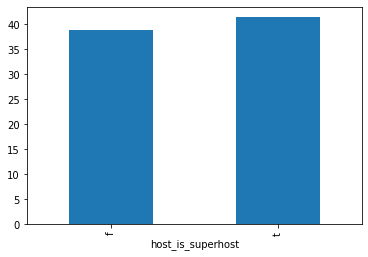

In [38]:
listings_cities.groupby('host_is_superhost')['USD_pp'].mean().plot.bar()

In [39]:
listings_cities.groupby('host_is_superhost')['USD_pp'].mean()

host_is_superhost
f    38.835579
t    41.439411
Name: USD_pp, dtype: float64

### Hypothesis 2: Room Type

In [40]:
listings_raw.groupby(['instant_bookable']).size()

instant_bookable
f    164105
t    115607
dtype: int64

In [41]:
instant_book = listings_cities[(listings_cities['instant_bookable'] == 'f')]
normal_book = listings_cities[(listings_cities['instant_bookable'] == 't')]

ztest(instant_book['USD_pp'], normal_book['USD_pp'], value=0)

(-9.548722928535115, 1.3130484040464138e-21)

<AxesSubplot:xlabel='instant_bookable'>

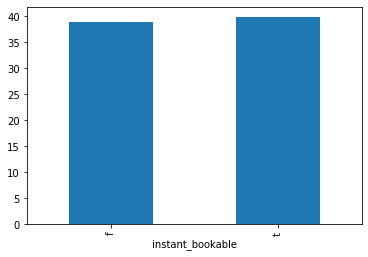

In [42]:
listings_cities.groupby('instant_bookable')['USD_pp'].mean().plot.bar()

In [43]:
listings_cities.groupby('instant_bookable')['USD_pp'].mean()

instant_bookable
f    38.855791
t    39.890573
Name: USD_pp, dtype: float64